# EDA_on_Students_performance_in_exams

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
student_performance=pd.read_csv('datasets_74977_169835_StudentsPerformance.csv')

In [2]:
student_performance.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [3]:
student_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
student_performance.shape

(1000, 8)

In [5]:
student_performance.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
student_performance.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
student_performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
student_performance.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [10]:
student_performance.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [11]:
#shows for each column the percentage of null values 
student_performance.isnull().sum() / student_performance.shape[0]

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [12]:
student_performance['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [13]:
student_performance['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [ ]:
Observation:
The above cell shows the info on the counts of students based on their etnicity.

In [14]:
student_performance['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [ ]:
Observation:
The above cell shows the info on the counts of students based on gender.

In [15]:
student_performance['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [16]:
student_performance['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [17]:
student_performance.iloc[:, 5:8].sum(axis=1)

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Length: 1000, dtype: int64

In [18]:
student_performance['total_marks']= student_performance.iloc[:, 5:8].sum(axis=1)

In [19]:
print(student_performance)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72        

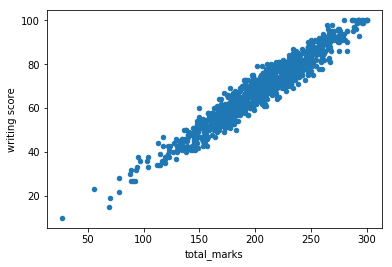

In [20]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

student_performance.plot(kind='scatter', x='total_marks', y='writing score') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

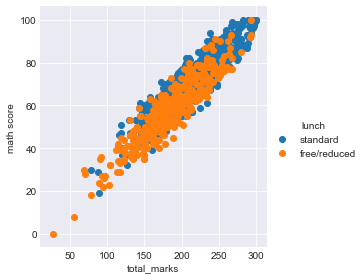

In [21]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("darkgrid");
sns.FacetGrid(student_performance, hue="lunch", size=4) \
   .map(plt.scatter, "total_marks", "math score") \
   .add_legend();
#plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

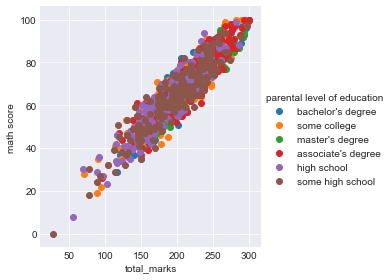

In [22]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("darkgrid");
sns.FacetGrid(student_performance, hue="parental level of education", size=4) \
   .map(plt.scatter, "total_marks", "math score") \
   .add_legend();
#plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

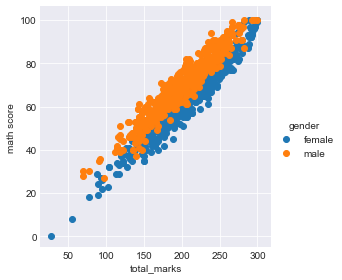

In [23]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("darkgrid");
sns.FacetGrid(student_performance, hue="gender", size=4) \
   .map(plt.scatter, "total_marks", "math score") \
   .add_legend();
#plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

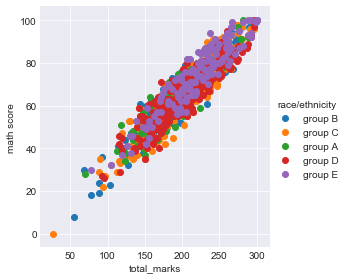

In [24]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("darkgrid");
sns.FacetGrid(student_performance, hue="race/ethnicity", size=4) \
   .map(plt.scatter, "total_marks", "math score") \
   .add_legend();
#plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

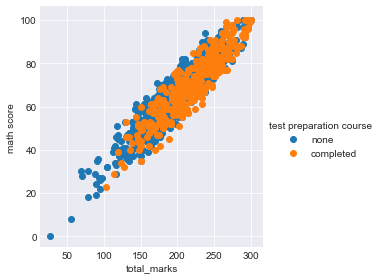

In [25]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("darkgrid");
sns.FacetGrid(student_performance, hue="test preparation course", size=4) \
   .map(plt.scatter, "total_marks", "math score") \
   .add_legend();
#plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

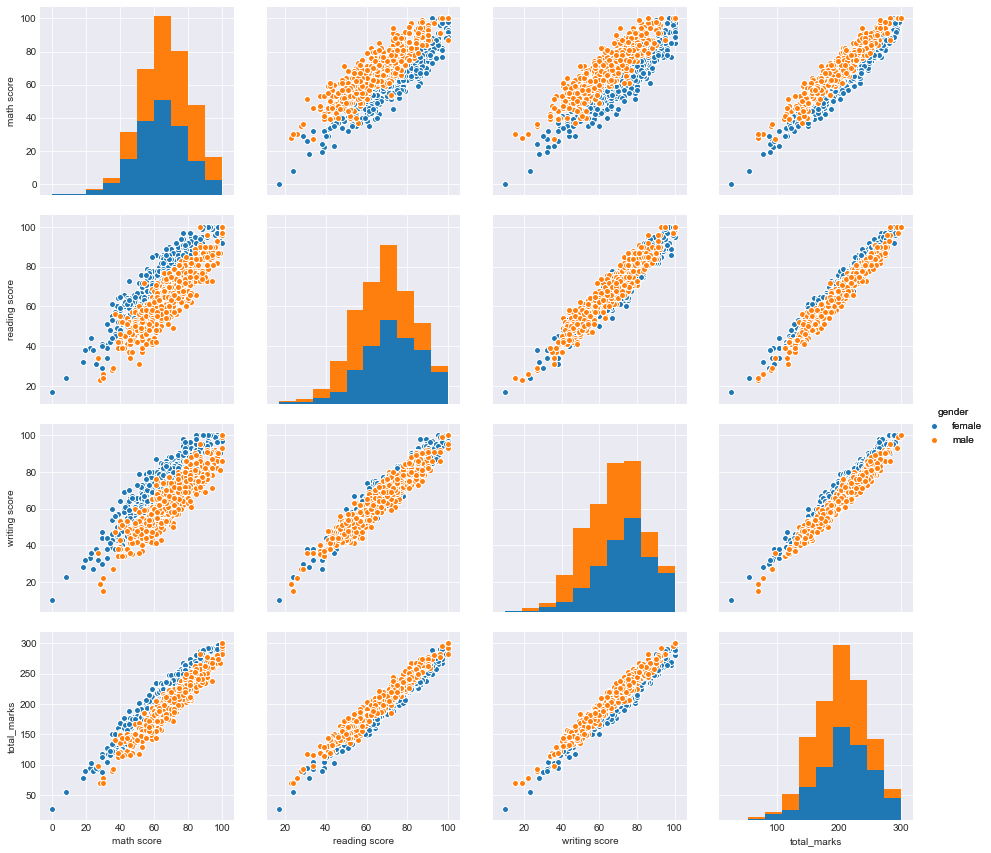

In [26]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Cannot be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("darkgrid");
sns.pairplot(student_performance, hue="gender", size=3).add_legend();
#plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

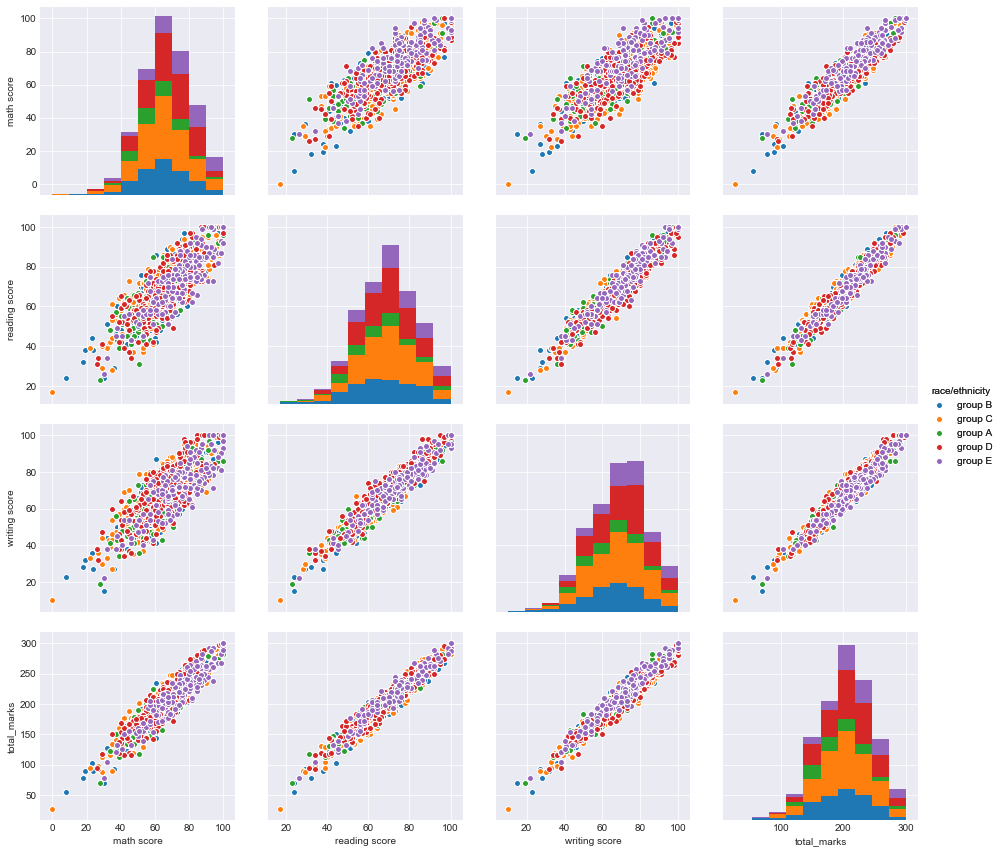

In [27]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Cannot be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("darkgrid");
sns.pairplot(student_performance, hue="race/ethnicity", size=3).add_legend();
#plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

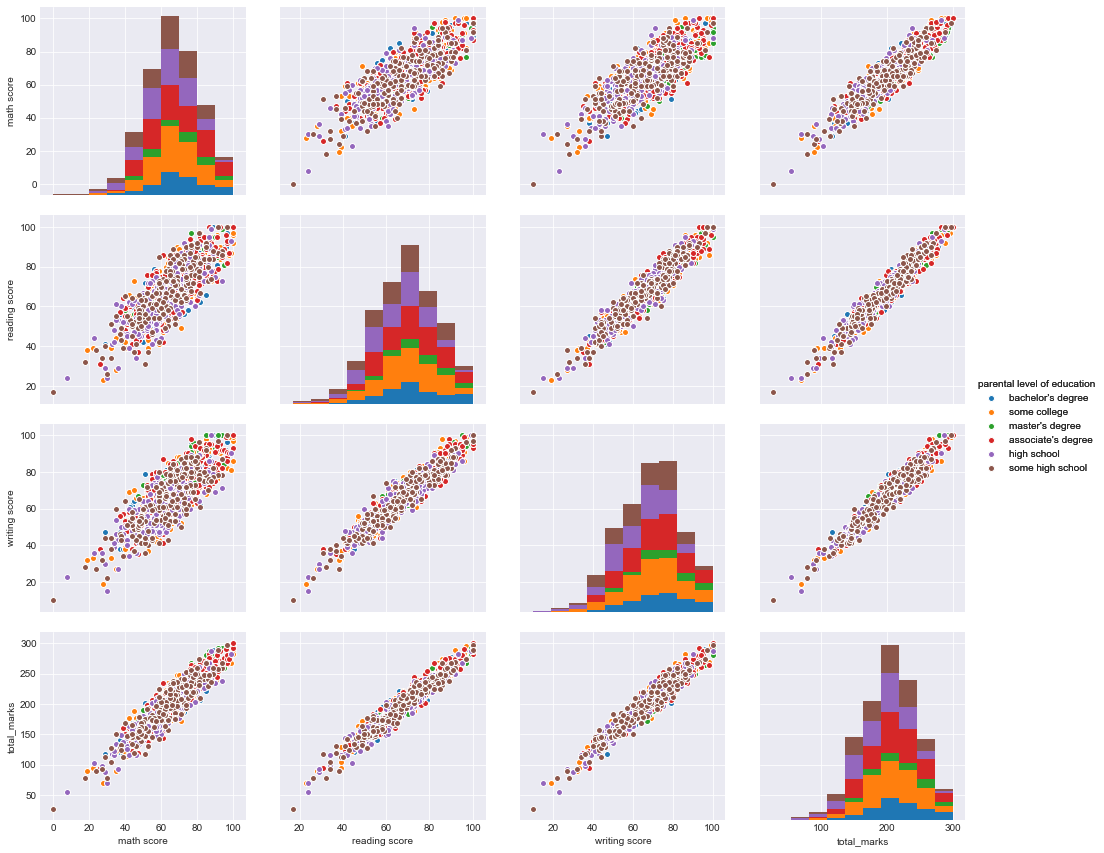

In [28]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Cannot be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("darkgrid");
sns.pairplot(student_performance, hue="parental level of education", size=3).add_legend();
#plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

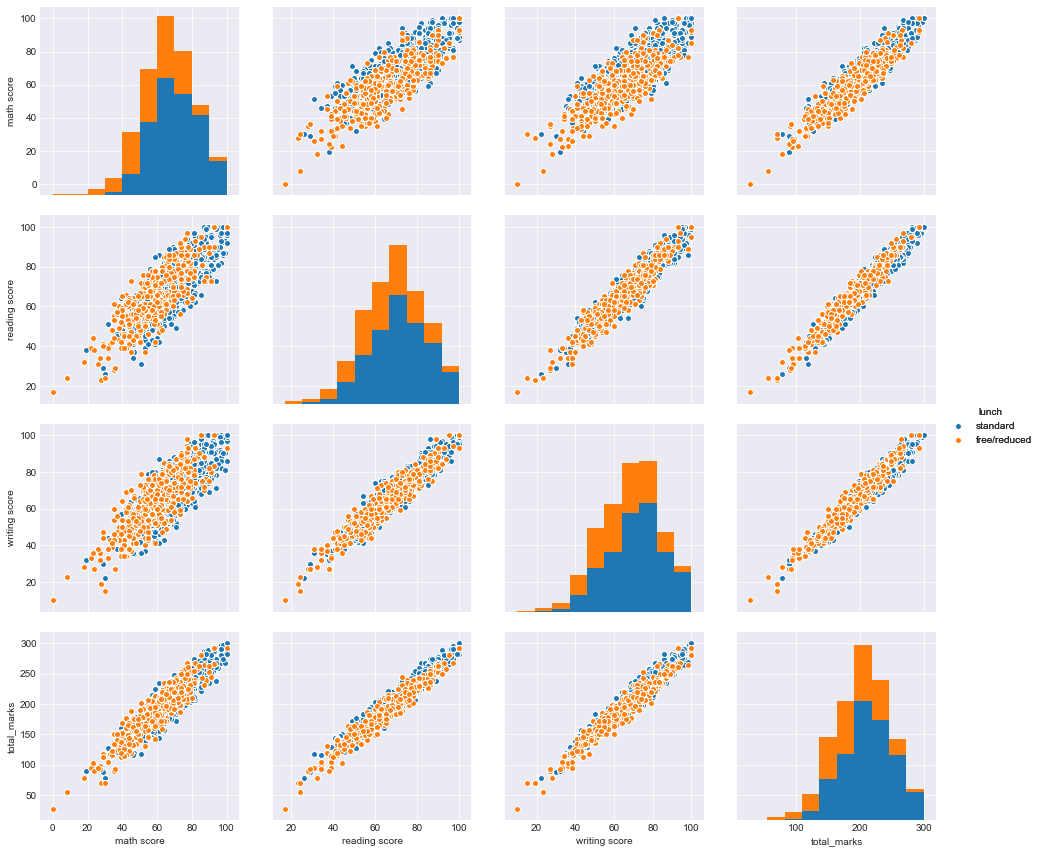

In [29]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Cannot be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("darkgrid");
sns.pairplot(student_performance, hue="lunch", size=3).add_legend();
#plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

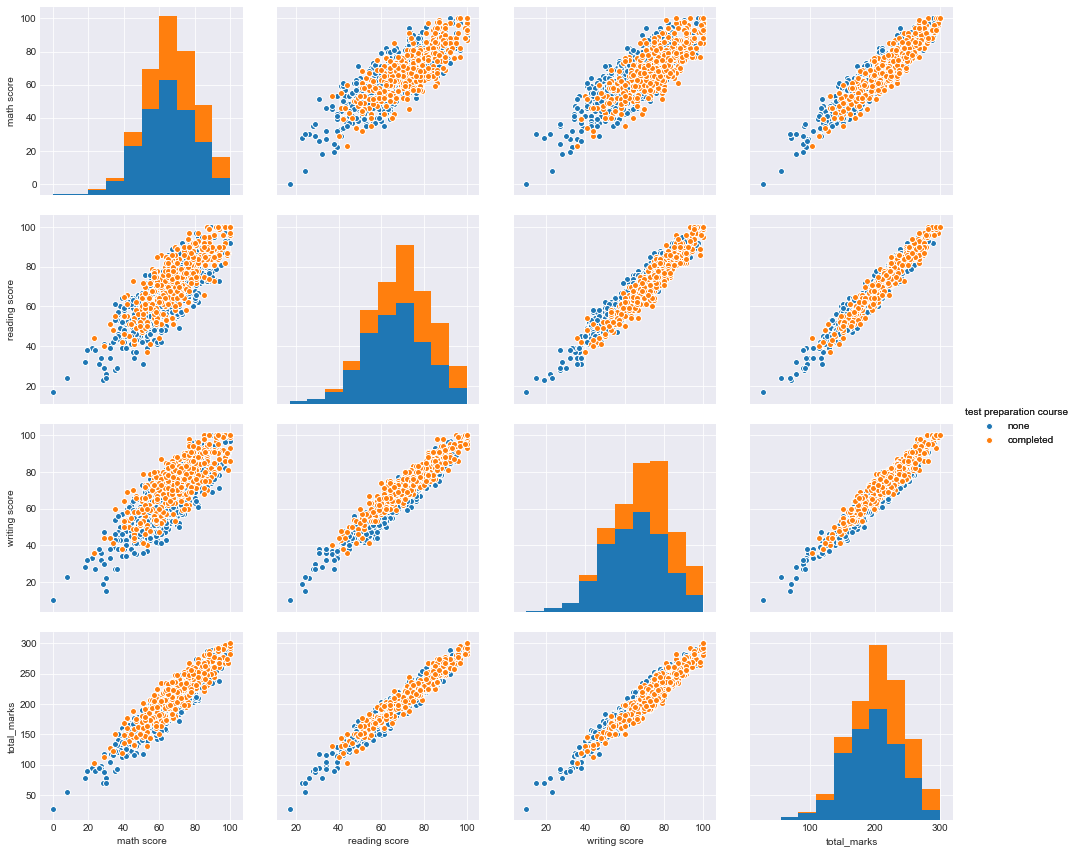

In [30]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Cannot be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("darkgrid");
sns.pairplot(student_performance, hue="test preparation course", size=3).add_legend();
#plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

In [31]:
student_performance[student_performance.total_marks==student_performance.total_marks.max()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks
458,female,group E,bachelor's degree,standard,none,100,100,100,300
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300


In [32]:
student_performance[student_performance.total_marks==student_performance.total_marks.min()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks
59,female,group C,some high school,free/reduced,none,0,17,10,27


In [33]:
student_performance.sort_values(by=['total_marks']).head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks
59,female,group C,some high school,free/reduced,none,0,17,10,27
980,female,group B,high school,free/reduced,none,8,24,23,55
596,male,group B,high school,free/reduced,none,30,24,15,69
327,male,group A,some college,free/reduced,none,28,23,19,70
76,male,group E,some high school,standard,none,30,26,22,78
17,female,group B,some high school,free/reduced,none,18,32,28,78
601,female,group C,high school,standard,none,29,29,30,88
787,female,group B,some college,standard,none,19,38,32,89
338,female,group B,some high school,free/reduced,none,24,38,27,89
211,male,group C,some college,free/reduced,none,35,28,27,90


In [89]:
student_performance.sort_values(by=['total_marks']).tail(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293
685,female,group E,master's degree,standard,completed,94,99,100,293
165,female,group C,bachelor's degree,standard,completed,96,100,100,296
625,male,group D,some college,standard,completed,100,97,99,296
712,female,group D,some college,standard,none,98,100,99,297
179,female,group D,some high school,standard,completed,97,100,100,297
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
458,female,group E,bachelor's degree,standard,none,100,100,100,300
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300


In [35]:
student_privilege=student_performance.groupby('lunch')

In [91]:
pd.options.display.max_columns = 4000

In [92]:
print(student_privilege.describe())

             math score                                                       \
                  count       mean        std   min   25%   50%   75%    max   
lunch                                                                          
free/reduced      355.0  58.921127  15.159956   0.0  49.0  60.0  69.0  100.0   
standard          645.0  70.034109  13.653501  19.0  61.0  69.0  80.0  100.0   

             reading score                                                \
                     count       mean        std   min   25%   50%   75%   
lunch                                                                      
free/reduced         355.0  64.653521  14.895339  17.0  56.0  65.0  75.0   
standard             645.0  71.654264  13.830602  26.0  63.0  72.0  82.0   

                    writing score                                          \
                max         count       mean        std   min   25%   50%   
lunch                                                           

In [38]:
student_gender=student_performance.groupby('gender')

In [39]:
print(student_gender.describe())

       math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0   

       reading score                                                        \
               count       mean        std   min    25%   50%   75%    max   
gender                                                                       
female         518.0  72.608108  14.378245  17.0  63.25  73.0  83.0  100.0   
male           482.0  65.473029  13.931832  23.0  56.00  66.0  75.0  100.0   

       writing score                                                        \
               count       mean        std   min   25%   50%    75%    max   
gender                                                                       
fema

In [40]:
under_privileged=student_performance[student_performance['lunch']=='free/reduced']
under_privileged.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
7,male,group B,some college,free/reduced,none,40,43,39,122
8,male,group D,high school,free/reduced,completed,64,64,67,195
9,female,group B,high school,free/reduced,none,38,60,50,148
17,female,group B,some high school,free/reduced,none,18,32,28,78


In [41]:
under_privilegedloc=student_performance.loc[student_performance['lunch']=='free/reduced']
under_privilegedloc.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
7,male,group B,some college,free/reduced,none,40,43,39,122
8,male,group D,high school,free/reduced,completed,64,64,67,195
9,female,group B,high school,free/reduced,none,38,60,50,148
17,female,group B,some high school,free/reduced,none,18,32,28,78


In [42]:
under_privileged[(under_privileged['math score']>=40) & (under_privileged['reading score']>=40) & (under_privileged['writing score']>=40)].shape

(316, 9)

In [43]:
under_privileged[(under_privileged['math score']<40) | (under_privileged['reading score']<40) | (under_privileged['writing score']<40)].shape

(39, 9)

In [44]:
pass_percentage_of_under_privileged_students=((under_privileged[(under_privileged['math score']>=40) & (under_privileged['reading score']>=40) & (under_privileged['writing score']>=40)].shape)[0])/((under_privileged.shape)[0])
pass_percentage_of_under_privileged_students

0.8901408450704226

In [45]:
under_privileged['gender'].value_counts()

female    189
male      166
Name: gender, dtype: int64

In [46]:
pass_percentage_of_under_privileged_girls=((under_privileged[(under_privileged['math score']>=40) & (under_privileged['reading score']>=40) & (under_privileged['writing score']>=40) & (under_privileged['gender']== 'female')].shape)[0])/((under_privileged[under_privileged['gender']== 'female'].shape)[0])
pass_percentage_of_under_privileged_girls

0.8677248677248677

In [94]:
pass_percentage_of_under_privileged_boys=((under_privileged[(under_privileged['math score']>=40) & (under_privileged['reading score']>=40) & (under_privileged['writing score']>=40) & (under_privileged['gender']== 'male')].shape)[0])/((under_privileged[under_privileged['gender']== 'male'].shape)[0])
pass_percentage_of_under_privileged_boys

0.9156626506024096

In [96]:
privileged=student_performance[student_performance['lunch']=='standard']
privileged.shape

(645, 9)

In [97]:
privileged[(privileged['math score']>=40) & (privileged['reading score']>=40) & (privileged['writing score']>=40)].shape

(633, 9)

In [98]:
privileged[(privileged['math score']<40) | (privileged['reading score']<40) | (privileged['writing score']<40)].shape

(12, 9)

In [51]:
pass_percentage_of_privileged_students=((privileged[(privileged['math score']>=40) & (privileged['reading score']>=40) & (privileged['writing score']>=40)].shape)[0])/((privileged.shape)[0])
pass_percentage_of_privileged_students

0.9813953488372092

In [99]:
privileged['gender'].value_counts()

female    329
male      316
Name: gender, dtype: int64

In [53]:
pass_percentage_of_privileged_girls=((privileged[(privileged['math score']>=40) & (privileged['reading score']>=40) & (privileged['writing score']>=40) & (privileged['gender']== 'female')].shape)[0])/((privileged[privileged['gender']== 'female'].shape)[0])
pass_percentage_of_privileged_girls

0.9817629179331308

In [54]:
pass_percentage_of_privileged_boys=((privileged[(privileged['math score']>=40) & (privileged['reading score']>=40) & (privileged['writing score']>=40) & (privileged['gender']== 'male')].shape)[0])/((privileged[privileged['gender']== 'male'].shape)[0])
pass_percentage_of_privileged_boys

0.9810126582278481

In [55]:
students_with_course=student_performance[student_performance['test preparation course']=='completed']
students_with_course.shape

(358, 9)

In [56]:
students_with_course.lunch.value_counts()

standard        227
free/reduced    131
Name: lunch, dtype: int64

In [57]:
students_with_course[students_with_course['lunch']=='free/reduced'].shape

(131, 9)

In [58]:
pass_percentage_of_students_with_course=((students_with_course[(students_with_course['math score']>=40) & (students_with_course['reading score']>=40) & (students_with_course['writing score']>=40)].shape)[0])/((students_with_course.shape)[0])
pass_percentage_of_students_with_course

0.9804469273743017

In [59]:
pass_percentage_of_privileged_students_with_course=((students_with_course[(students_with_course['math score']>=40) & (students_with_course['reading score']>=40) & (students_with_course['writing score']>=40) & (students_with_course['lunch']=='standard')].shape)[0])/((students_with_course[students_with_course['lunch']=='standard'].shape)[0])
pass_percentage_of_privileged_students_with_course

0.9955947136563876

In [60]:
pass_percentage_of_unprivileged_students_with_course=((students_with_course[(students_with_course['math score']>=40) & (students_with_course['reading score']>=40) & (students_with_course['writing score']>=40) & (students_with_course['lunch']=='free/reduced')].shape)[0])/((students_with_course[students_with_course['lunch']=='free/reduced'].shape)[0])
pass_percentage_of_unprivileged_students_with_course

0.9541984732824428

In [61]:
students_with_course.gender.value_counts()

female    184
male      174
Name: gender, dtype: int64

In [62]:
pass_percentage_of_boys_with_course=((students_with_course[(students_with_course['math score']>=40) & (students_with_course['reading score']>=40) & (students_with_course['writing score']>=40) & (students_with_course['gender']== 'male')].shape)[0]) /((students_with_course[students_with_course['gender']== 'male'].shape)[0])
pass_percentage_of_boys_with_course

0.9885057471264368

In [63]:
pass_percentage_of_girls_with_course=((students_with_course[(students_with_course['math score']>=40) & (students_with_course['reading score']>=40) & (students_with_course['writing score']>=40) & (students_with_course['gender']== 'female')].shape)[0]) /((students_with_course[students_with_course['gender']== 'female'].shape)[0])
pass_percentage_of_girls_with_course

0.9728260869565217

In [64]:
students_without_course=student_performance[student_performance['test preparation course']=='none']
students_without_course.shape

(642, 9)

In [65]:
students_without_course[students_without_course['lunch']=='standard'].shape

(418, 9)

In [66]:
students_without_course[students_without_course['lunch']=='free/reduced'].shape

(224, 9)

In [67]:
pass_percentage_of_students_without_course=((students_without_course[(students_without_course['math score']>=40) & (students_without_course['reading score']>=40) & (students_without_course['writing score']>=40)].shape)[0])/((students_without_course.shape)[0])
pass_percentage_of_students_without_course

0.9314641744548287

In [100]:
pass_percentage_of_privileged_students_without_course=((students_without_course[(students_without_course['math score']>=40) & (students_without_course['reading score']>=40) & (students_without_course['writing score']>=40) & (students_without_course['lunch']=='standard')].shape)[0])/((students_without_course[students_without_course['lunch']=='standard'].shape)[0])
pass_percentage_of_privileged_students_without_course

0.9736842105263158

Observation:97% of privileged students without preparation course have passed.

In [70]:
pass_percentage_of_unprivileged_students_without_course=((students_without_course[(students_without_course['math score']>40) & (students_without_course['reading score']>40) & (students_without_course['writing score']>40) & (students_without_course['lunch']=='free/reduced')].shape)[0])/((students_without_course[students_without_course['lunch']=='free/reduced'].shape)[0])
pass_percentage_of_unprivileged_students_without_course

0.8392857142857143

In [101]:
pass_percentage_of_boys_without_course=((students_without_course[(students_without_course['math score']>=40) & (students_without_course['reading score']>=40) & (students_without_course['writing score']>=40) & (students_without_course['gender']== 'male')].shape)[0]) /((students_without_course[students_without_course['gender']== 'male'].shape)[0])
pass_percentage_of_boys_without_course

0.9415584415584416

In [102]:
pass_percentage_of_girls_without_course=((students_without_course[(students_without_course['math score']>=40) & (students_without_course['reading score']>=40) & (students_without_course['writing score']>=40) & (students_without_course['gender']== 'female')].shape)[0]) /((students_without_course[students_without_course['gender']== 'female'].shape)[0])
pass_percentage_of_girls_without_course

0.9221556886227545

In [73]:
student_performance.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_marks'],
      dtype='object')

C:\Users\manoj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


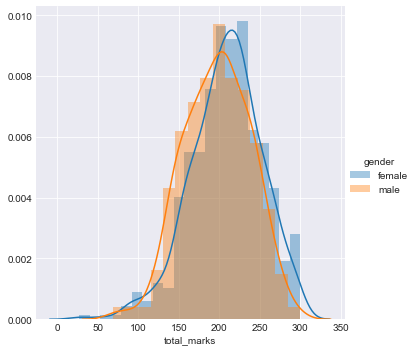

In [74]:
sns.FacetGrid(student_performance, hue="gender", size=5) \
   .map(sns.distplot, "total_marks") \
   .add_legend();
plt.show();

C:\Users\manoj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, a

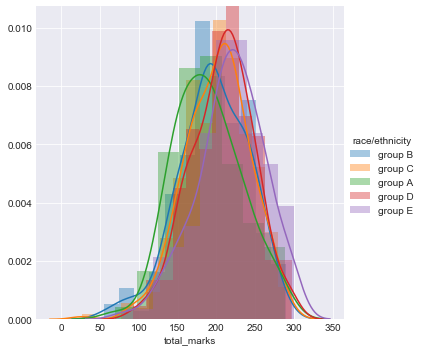

In [75]:
sns.FacetGrid(student_performance, hue="race/ethnicity", size=5) \
   .map(sns.distplot, "total_marks") \
   .add_legend();
plt.show();

C:\Users\manoj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, a

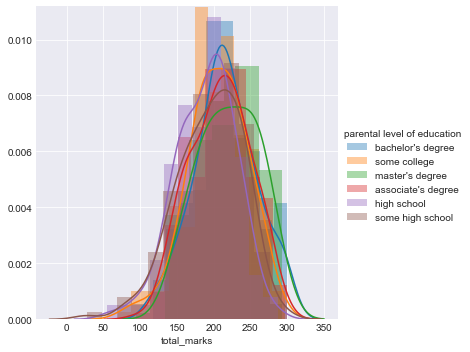

In [76]:
sns.FacetGrid(student_performance, hue="parental level of education", size=5) \
   .map(sns.distplot, "total_marks") \
   .add_legend();
plt.show();

C:\Users\manoj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


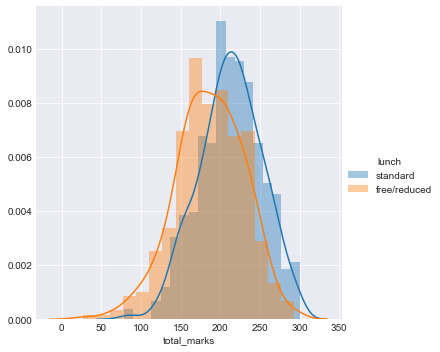

In [77]:
sns.FacetGrid(student_performance, hue="lunch", size=5) \
   .map(sns.distplot, "total_marks") \
   .add_legend();
plt.show();

C:\Users\manoj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


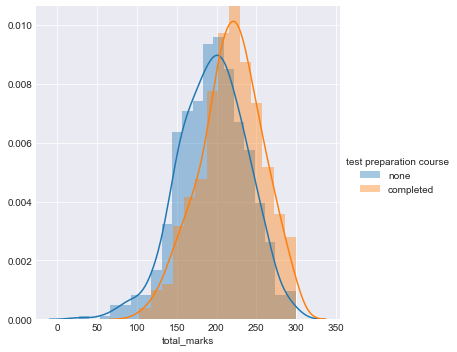

In [78]:
sns.FacetGrid(student_performance, hue="test preparation course", size=5) \
   .map(sns.distplot, "total_marks") \
   .add_legend();
plt.show();

(array([  2,   2,  10,  26,  95, 188, 268, 216, 135,  58], dtype=int64), array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))
[0.002 0.002 0.01  0.026 0.095 0.188 0.268 0.216 0.135 0.058]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


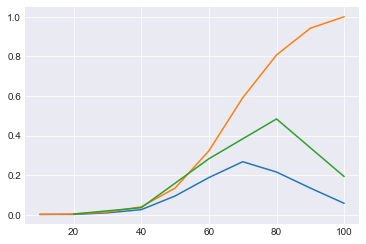

In [82]:
#REFER program.txt
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length
#print(iris_setosa['petal.length'])
print(np.histogram(student_performance['math score'], bins=10, 
                                 density = False))
counts, bin_edges = np.histogram(student_performance['math score'], bins=10, 
                                 density = True)
#print(max(iris_setosa['petal.length']))
#print(min(iris_setosa['petal.length']))
#print("counts:",counts)
#print("Sum:",sum(counts))
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(student_performance['math score'], bins=5, 
                                 density = True)
#print (counts)
#print (bin_edges)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


(array([  4,   7,  22,  64, 140, 182, 237, 168, 120,  56], dtype=int64), array([ 17. ,  25.3,  33.6,  41.9,  50.2,  58.5,  66.8,  75.1,  83.4,
        91.7, 100. ]))
[0.004 0.007 0.022 0.064 0.14  0.182 0.237 0.168 0.12  0.056]
[ 17.   25.3  33.6  41.9  50.2  58.5  66.8  75.1  83.4  91.7 100. ]


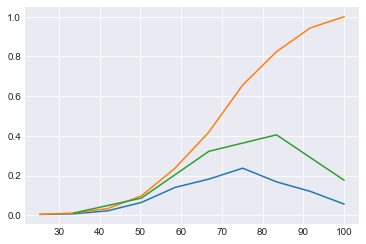

In [83]:
#REFER program.txt
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length
#print(iris_setosa['petal.length'])
print(np.histogram(student_performance['reading score'], bins=10, 
                                 density = False))
counts, bin_edges = np.histogram(student_performance['reading score'], bins=10, 
                                 density = True)
#print(max(iris_setosa['petal.length']))
#print(min(iris_setosa['petal.length']))
#print("counts:",counts)
#print("Sum:",sum(counts))
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(student_performance['reading score'], bins=5, 
                                 density = True)
#print (counts)
#print (bin_edges)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


(array([  2,   6,  14,  55, 126, 161, 223, 225, 120,  68], dtype=int64), array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]))
[0.002 0.006 0.014 0.055 0.126 0.161 0.223 0.225 0.12  0.068]
[ 10.  19.  28.  37.  46.  55.  64.  73.  82.  91. 100.]


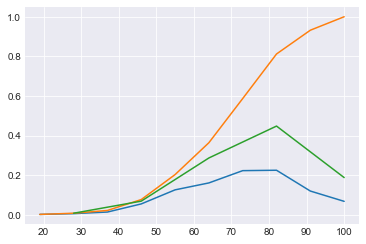

In [84]:
#REFER program.txt
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length
#print(iris_setosa['petal.length'])
print(np.histogram(student_performance['writing score'], bins=10, 
                                 density = False))
counts, bin_edges = np.histogram(student_performance['writing score'], bins=10, 
                                 density = True)
#print(max(iris_setosa['petal.length']))
#print(min(iris_setosa['petal.length']))
#print("counts:",counts)
#print("Sum:",sum(counts))
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(student_performance['writing score'], bins=5, 
                                 density = True)
#print (counts)
#print (bin_edges)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[0.002 0.002 0.01  0.026 0.095 0.188 0.268 0.216 0.135 0.058]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
[0.004 0.007 0.022 0.064 0.14  0.182 0.237 0.168 0.12  0.056]
[ 17.   25.3  33.6  41.9  50.2  58.5  66.8  75.1  83.4  91.7 100. ]
[0.002 0.006 0.014 0.055 0.126 0.161 0.223 0.225 0.12  0.068]
[ 10.  19.  28.  37.  46.  55.  64.  73.  82.  91. 100.]


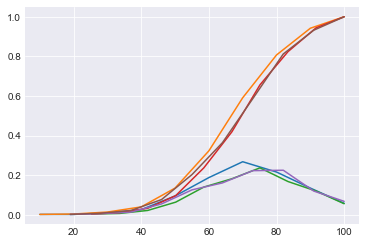

In [85]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(student_performance['math score'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(student_performance['reading score'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(student_performance['writing score'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# SUMMARY:
